In [1]:
import numpy as np
from DumbTruck import DumbTruck

In [2]:
#Set up the data generation
gen = DumbTruck()
initial = np.array([[1],[1]])
process = gen.process(initial, t=10, dt=0.02, k=0.1, ep=0.01)
measure = gen.measure(process, nu=0.01)

In [3]:
#Inspect our outputs to make sure they are correct
process

array([[1.        , 2.        , 2.90641673, 3.71033539, 4.42160623,
        5.06131302, 5.65494972, 6.20017573, 6.68381315, 7.0937582 ,
        7.45465257],
       [1.        , 0.90641673, 0.80391866, 0.71127084, 0.63970679,
        0.5936367 , 0.54522601, 0.48363742, 0.40994505, 0.36089437,
        0.33173765]])

In [4]:
measure

array([[1.00635731, 1.99090408, 2.9095776 , 3.69789692, 4.43116275,
        5.07870838, 5.66174439, 6.19687229, 6.6859882 , 7.09110192,
        7.47109612],
       [0.99942936, 0.91977566, 0.79895199, 0.71053099, 0.61571356,
        0.60662525, 0.54910828, 0.47903137, 0.40755847, 0.3468854 ,
        0.32764636]])

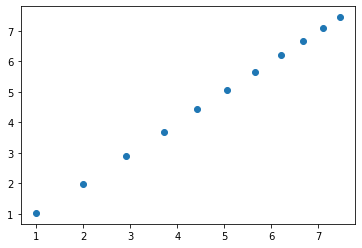

In [5]:
#Plotting only - I use mpl but you can use something else
import matplotlib.pyplot as plt
plt.scatter(process[0], measure[0])

#Not a ton of noise

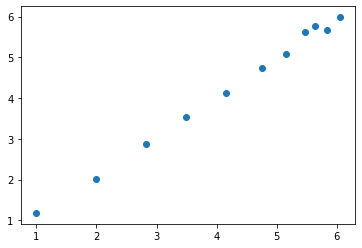

In [6]:
#Trying more measurement noise this time
process = gen.process(initial, t=10, dt=0.02, k=0.1, ep=0.1)
measure = gen.measure(process, nu=0.1)
plt.scatter(process[0], measure[0])


Text(0, 0.5, 'Position')

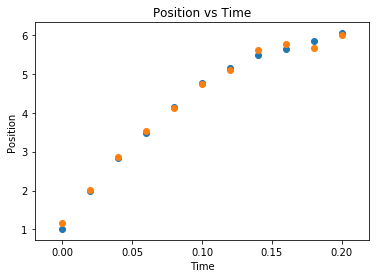

In [7]:
t = 10
dt = .02
plt.scatter(np.arange(0, (t + 1) * dt, 0.02), process[0])
plt.scatter(np.arange(0, (t + 1) * dt, 0.02), measure[0])
plt.title("Position vs Time")
plt.xlabel("Time")
plt.ylabel("Position")

Text(0, 0.5, 'Velocity')

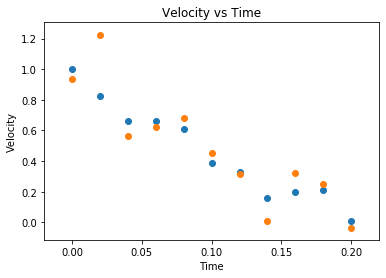

In [8]:
t = 10
dt = .02
plt.scatter(np.arange(0, (t + 1) * dt, 0.02), process[1])
plt.scatter(np.arange(0, (t + 1) * dt, 0.02), measure[1])
plt.title("Velocity vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity")